<a href="https://colab.research.google.com/github/suha-p/The_Sparks_Foundation-GRIPOCTOBER21/blob/main/Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation
# Data Science and Business Analytics (GRIP OCTOBER21)
# Task 1: Prediction using Supervised ML
# Author : SUHA P

Statement: What will be the predicted score if the student studied for 9.25hrs/day?

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
%matplotlib inline

In [ ]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data has been imported successfully")

Data has been imported successfully


In [ ]:
#print first 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#shape of data
data.shape

(25, 2)

In [ ]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
#data types
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
#statistical infomation about the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#check missing data
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

# Visualization

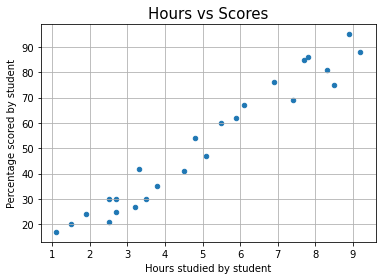

In [ ]:
#visualization
data.plot(x='Hours',y='Scores',kind='scatter')
plt.title('Hours vs Scores',size = 15)
plt.xlabel('Hours studied by student',size=10)
plt.ylabel('Percentage scored by student',size=10)
plt.grid(True)

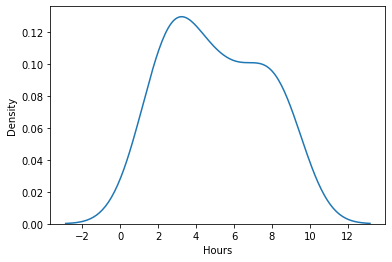

In [ ]:
sns.kdeplot(data['Hours'])

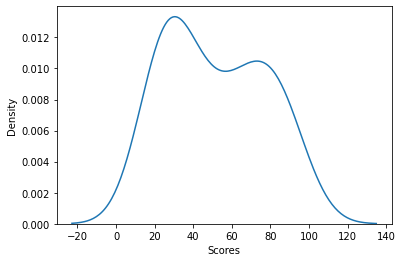

In [ ]:
sns.kdeplot(data['Scores'])

In [ ]:
#divide the data into attributes and labels
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [ ]:
#split data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [ ]:
#training model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
#fit the data to model
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#find intercept and coefficient of model
print(f'Intercept: {lm.intercept_}')
print(f'Coefficient: {lm.coef_}')


Intercept: 2.018160041434662
Coefficient: [9.91065648]


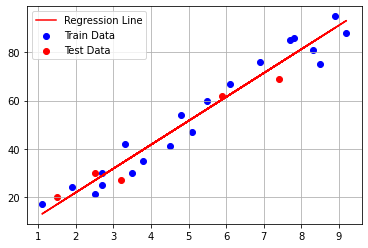

In [ ]:
#plot the regression line
line = lm.intercept_+lm.coef_*X
plt.scatter(X_train,y_train,color = 'blue',label = 'Train Data')
plt.scatter(X_test,y_test,color = 'red',label = 'Test Data')
plt.plot(X,line,color = 'red',label = 'Regression Line')
plt.legend()
plt.grid(True)

In [ ]:
#predictions using X_test
y_pred = lm.predict(X_test)

In [ ]:
prediction = pd.DataFrame({'Actual value':y_test,'Predcited value':y_pred})

In [ ]:
prediction

,Actual value,Predcited value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


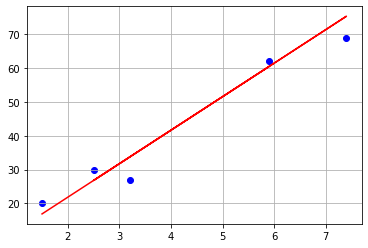

In [ ]:
#Actual vs Predicted
plt.scatter(X_test,y_test,color = 'blue')
plt.plot(X_test,y_pred,color = 'red')
plt.grid(True)

In [ ]:
print(f'Testing Accuracy: {lm.score(X_train,y_train)}')
print(f'Testing Accuracy: {lm.score(X_test,y_test)}')

Testing Accuracy: 0.9515510725211553
Testing Accuracy: 0.9454906892105354


In [ ]:
#prediction
hrs = 9.25
print(f'Predicted score for a student if he study {hrs}hrs/day is {lm.predict([[hrs]])}')

Predicted score for a student if he study 9.25hrs/day is [93.69173249]


In [ ]:
#evaluation of model
from sklearn import metrics

In [ ]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred)}')
print(f'Root Mean squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
print(f'Maximum Error: {metrics.max_error(y_test,y_pred)}')

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean squared Error: 4.647447612100373
Maximum Error: 6.732260779489835


# Thank you